<a href="https://colab.research.google.com/github/SidRaghuveer15/FirstRep/blob/main/BL_EN_U4CSE20161_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(columns=['age','income','student','credit_rating','buys_computer'])
df.loc[0] = ['<=30','high','no','fair','no']
df.loc[1] = ['<=30','high','no','excellent','no']
df.loc[2] = ['31..40','high','no','fair','yes']
df.loc[3] = ['>40','medium','no','fair','yes']
df.loc[4] = ['>40','low','yes','fair','yes']
df.loc[5] = ['>40','low','yes','excellent','no']
df.loc[6] = ['31..40','low','yes','excellent','yes']
df.loc[7] = ['<=30','medium','no','fair','no']
df.loc[8] = ['<=30','low','yes','fair','yes']
df.loc[9] = ['>40','medium','yes','fair','yes']
df.loc[10] = ['<=30','medium','yes','excellent','yes']
df.loc[11] = ['31..40','medium','no','excellent','yes']
df.loc[12] = ['31..40','high','yes','fair','yes']
df.loc[13] = ['>40','medium','no','excellent','no']

df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

print(entropy(df['age']))               
print(entropy(df['income']))            
print(entropy(df['student']))          
print(entropy(df['credit_rating']))    
print(entropy(df['buys_computer']))     



1.5774062828523454
1.5566567074628228
1.0
0.9852281360342515
0.9402859586706311


In [ ]:

def InfoGain(data,split_attribute_name,target_name="buys_computer"):
    
    total_entropy = entropy(data[target_name])
   
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
   
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
   
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain


print(InfoGain(df,'age'))          
print(InfoGain(df,'income'))       
print(InfoGain(df,'student'))      
print(InfoGain(df,'credit_rating'))
print(InfoGain(df,'buys_computer'))

print(max(InfoGain(df,'age'),InfoGain(df,'income'),InfoGain(df,'student'),InfoGain(df,'credit_rating'),InfoGain(df,'buys_computer')))



0.24674981977443933
0.02922256565895487
0.15183550136234159
0.04812703040826949
0.9402859586706311
0.9402859586706311


In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
def convert(df):
    number = preprocessing.LabelEncoder()
    for col in df.columns:
        df[col] = number.fit_transform(df[col])
convert(df)
print(df)

model = DecisionTreeClassifier()
model.fit(df[['age','income','student','credit_rating']],df['buys_computer'])
print(model.score(df[['age','income','student','credit_rating']],df['buys_computer'])) # accuracy of the model
print(model.get_depth()) # 3




    age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0
1.0
4


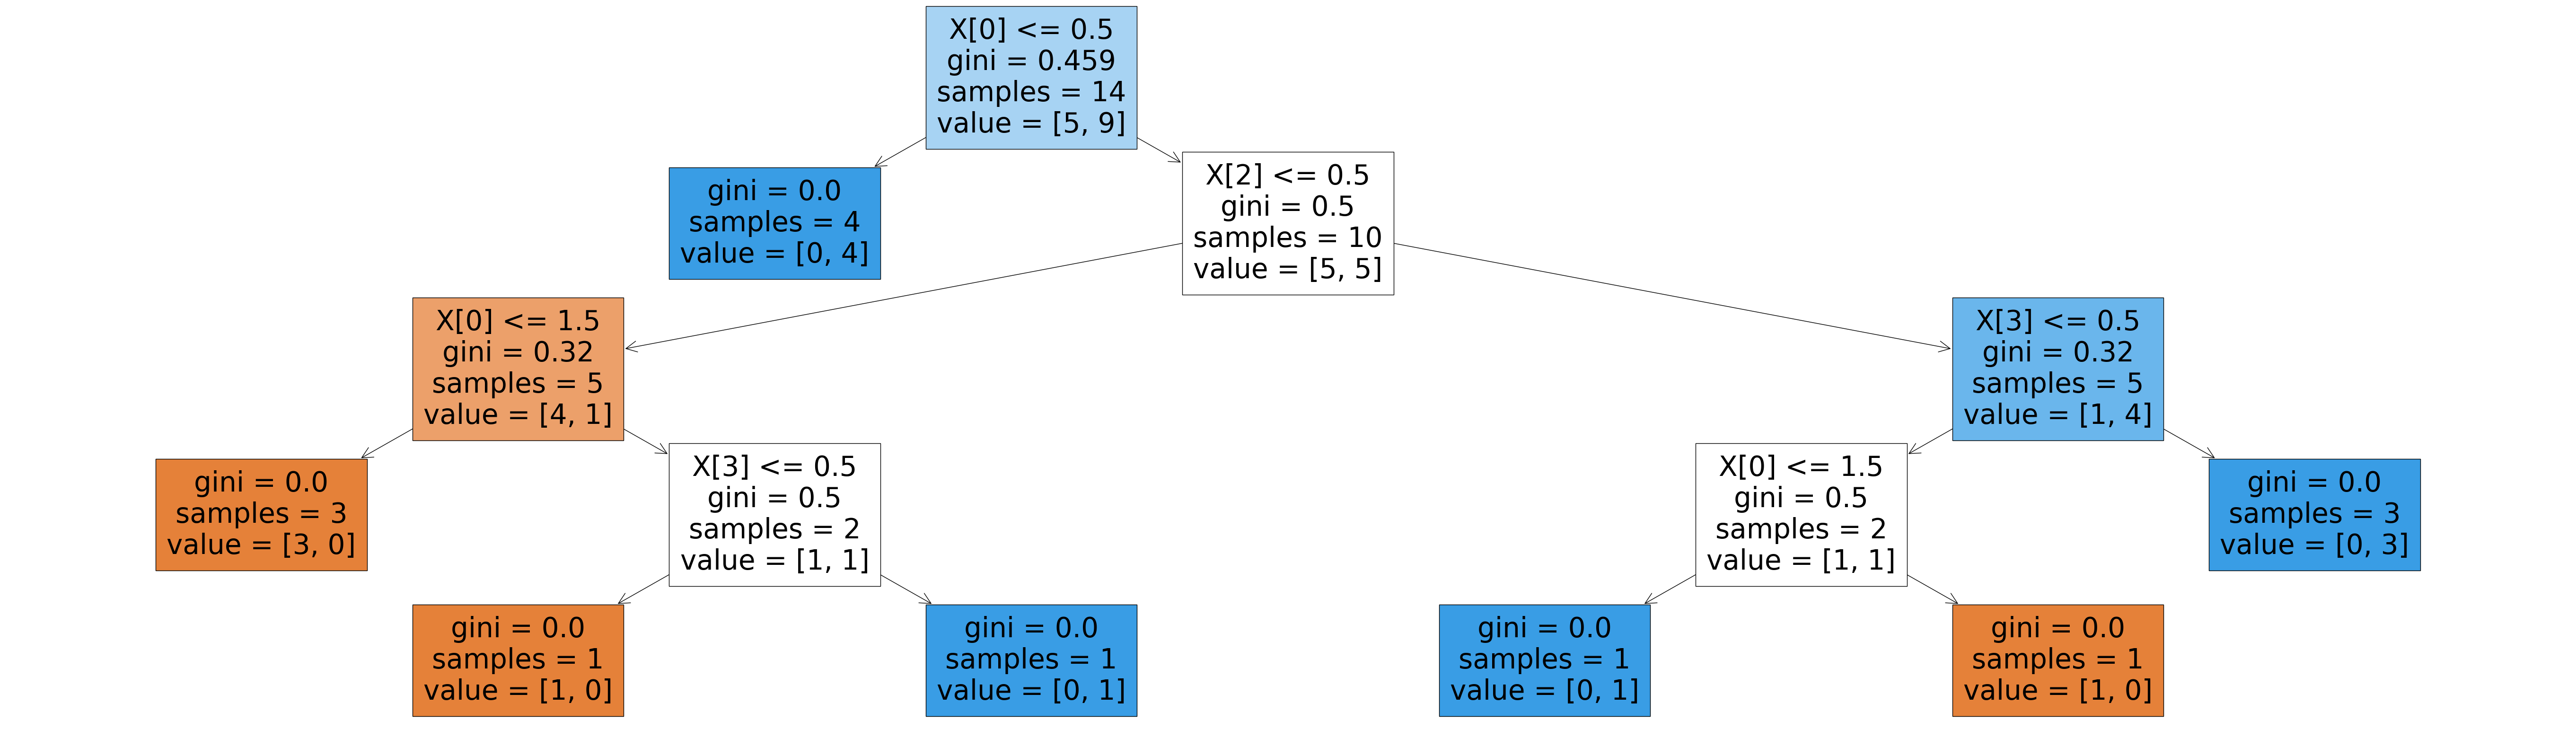

In [ ]:


import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:


from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
Tr_X, Te_X, Tr_y, Te_y = train_test_split(df.drop('buys_computer', axis=1) , df['buys_computer'], test_size=0.3, random_state=42 )
model.fit(Tr_X,Tr_y)
print("Training Accuracy:",model.score(Tr_X, Tr_y))  
print("Testing Accuracy:",model.score(Te_X, Te_y))  
print("Depth:",model.get_depth()) 


Training Accuracy: 1.0
Testing Accuracy: 0.6
Depth: 4


Training Accuracy: 1.0
Testing Accuracy: 0.6
Depth: 4


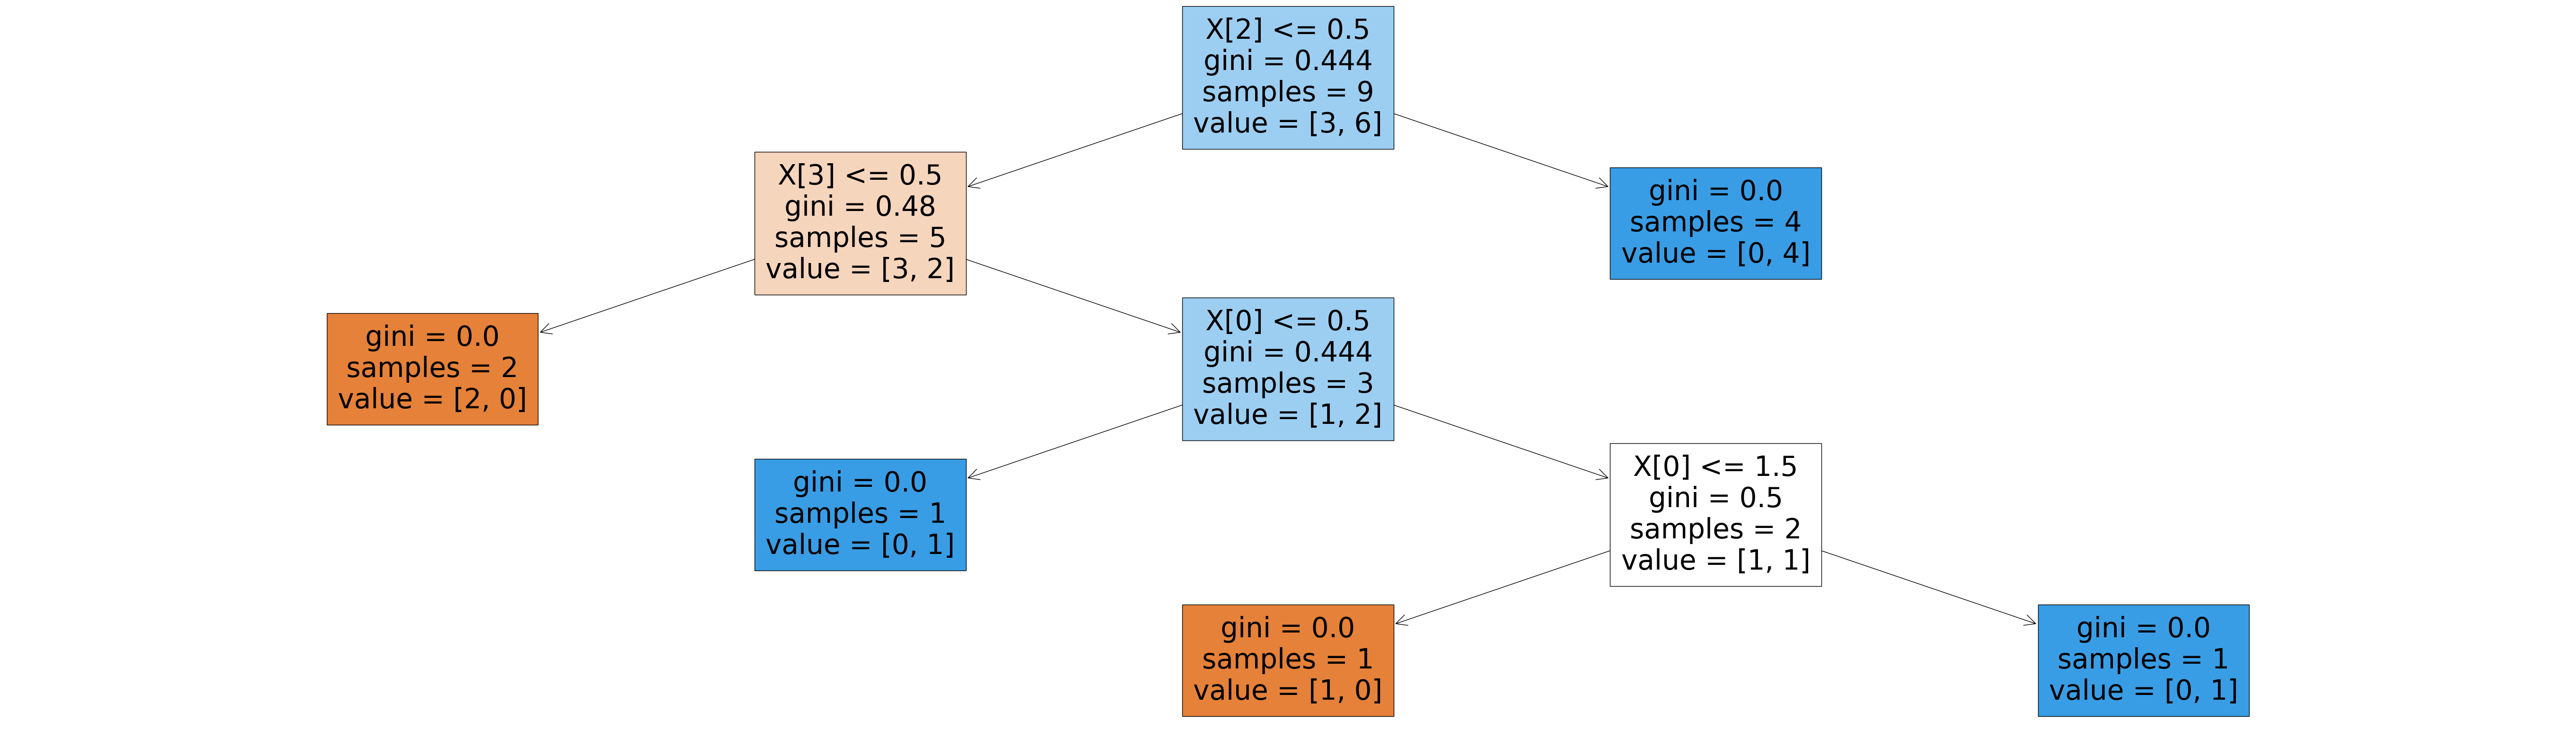

In [ ]:


model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X,Tr_y)
print("Training Accuracy:",model.score(Tr_X, Tr_y)) 
print("Testing Accuracy:",model.score(Te_X, Te_y))  
print("Depth:",model.get_depth()) 

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:


model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(Tr_X,Tr_y)
print(model.score(Tr_X, Tr_y))
print(model.score(Te_X,Te_y))

1.0
0.4
